### Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from src.dataset.isic import ISICDataset
from src.feature_extraction import unseggnet_extract, unseggnet_feature_extractor
from src.utils import unseggnet_utils
from src.segmentaion.unseggnet import Segmentation

2025-01-07 16:15:20.530189: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 16:15:20.607047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736262920.661652    3961 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736262920.678258    3961 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 16:15:20.775085: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Configuration
dataset_path = "/home/meriem-mk/Downloads/ISBI2016_ISIC_Part3B_Training_Data"  
resolution = (224, 224) 
process = "DINO"  
activation = "selu"
loss_type = "DMON"
threshold = 0.5
conv_type = "ARMA"
bs = False

In [3]:
seg = Segmentation(
    process=process, 
    epochs=20, 
    resolution=resolution, 
    activation=activation, 
    loss_type=loss_type, 
    threshold=threshold, 
    conv_type=conv_type,
    bs=bs
)

/home/meriem-mk/Image_Segmentation_With_GNNs/notebooks/../src/feature_extraction/unseggnet_feature_extractor.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict 

In [4]:
dataset = ISICDataset(
    root=dataset_path, 
    return_mask=True
)

In [5]:
sample = dataset[0]  
image = sample['image']  
mask = sample['mask']  

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)


iou, predicted_mask, _ = seg.segment(image_np, mask_np)

/home/meriem-mk/Image_Segmentation_With_GNNs/notebooks/../src/segmentaion/unseggnet.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

## Results for UNSEGGNET with conv_type = "ARMA"

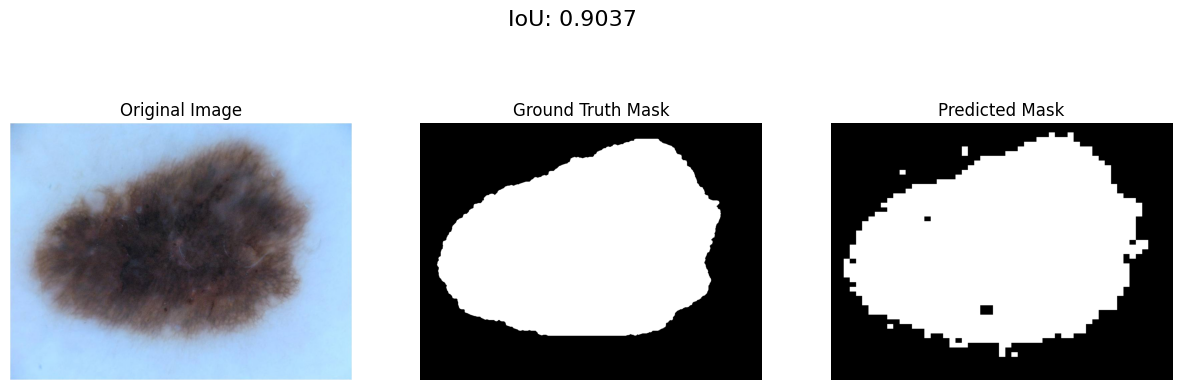

In [6]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(mask_np, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.suptitle(f"IoU: {iou:.4f}", fontsize=16)
plt.show()

# Try KMEANS

In [7]:
process = "KMEANS_DINO" 

In [8]:
seg = Segmentation(
    process=process, 
    epochs=20, 
    resolution=resolution, 
    activation=activation, 
    loss_type=loss_type, 
    threshold=threshold, 
    conv_type=conv_type,
    bs=bs
)

In [9]:
sample = dataset[0]  
image = sample['image']  
mask = sample['mask']  

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)


iou, predicted_mask, _ = seg.segment(image_np, mask_np)

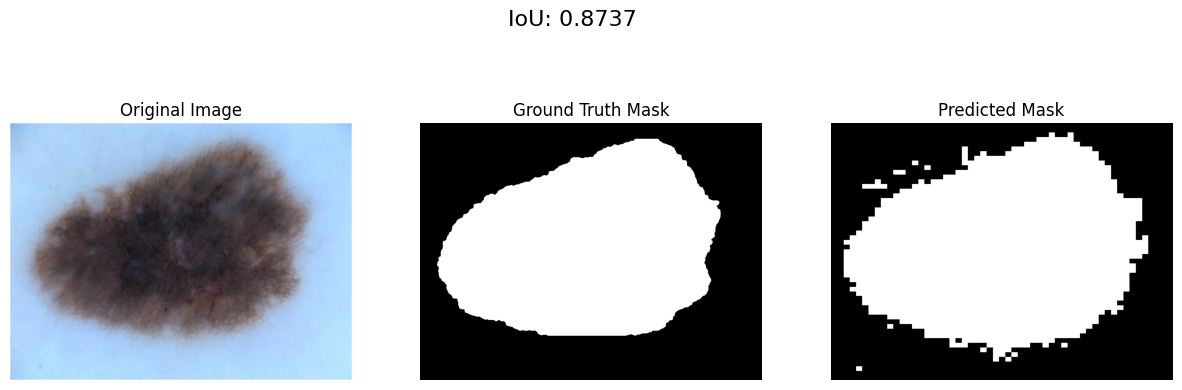

In [10]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(mask_np, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.suptitle(f"IoU: {iou:.4f}", fontsize=16)
plt.show()

## Try conv_type = "GCN"

In [11]:
conv_type = "GCN"
process = "DINO"

In [12]:
seg = Segmentation(
    process=process, 
    epochs=20, 
    resolution=resolution, 
    activation=activation, 
    loss_type=loss_type, 
    threshold=threshold, 
    conv_type=conv_type,
    bs=bs
)

/home/meriem-mk/Image_Segmentation_With_GNNs/notebooks/../src/feature_extraction/unseggnet_feature_extractor.py:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict 

In [13]:
sample = dataset[0]  
image = sample['image']  
mask = sample['mask']  

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)


iou, predicted_mask, _ = seg.segment(image_np, mask_np)

/home/meriem-mk/Image_Segmentation_With_GNNs/notebooks/../src/segmentaion/unseggnet.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.loa

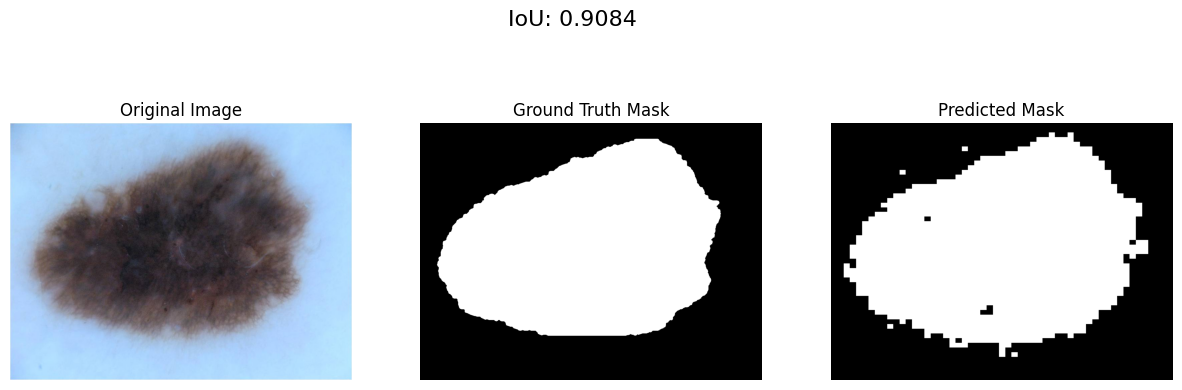

In [14]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(mask_np, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.suptitle(f"IoU: {iou:.4f}", fontsize=16)
plt.show()

## Try bs = True  with conv_type = "GCN"

In [15]:
bs = True

In [16]:
seg = Segmentation(
    process=process, 
    epochs=20, 
    resolution=resolution, 
    activation=activation, 
    loss_type=loss_type, 
    threshold=threshold, 
    conv_type=conv_type,
    bs=bs
)

In [17]:
sample = dataset[0]  
image = sample['image']  
mask = sample['mask']  

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)


iou, predicted_mask, _ = seg.segment(image_np, mask_np)

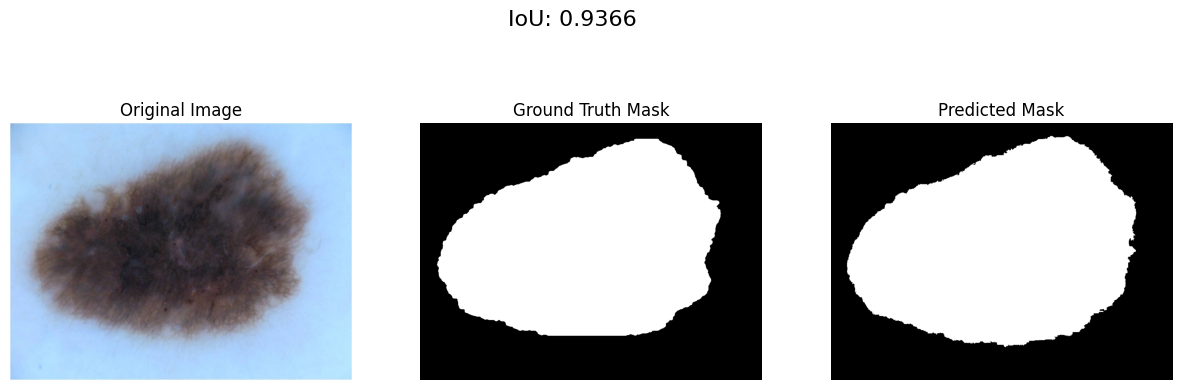

In [18]:
# Visualize the results
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(mask_np, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

# Predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.suptitle(f"IoU: {iou:.4f}", fontsize=16)
plt.show()